In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image

In [18]:
def kmeans_clustering(data, k, iters):
    centroids_idx = np.random.randint(0, data.shape[0]-1, k)
    centroids = data[centroids_idx, :]
    for i in range(iters):
        distances = (data ** 2).sum(axis=1).reshape(-1, 1) + (centroids ** 2).sum(axis=1).reshape(1, -1) - 2 * (data @ centroids.T)
        clusters = distances.argmin(axis=1)
        for i in range(k):
            centroids[i] = data[clusters == i, :].mean(axis=0)
    return centroids, clusters

(-0.5, 511.5, 511.5, -0.5)

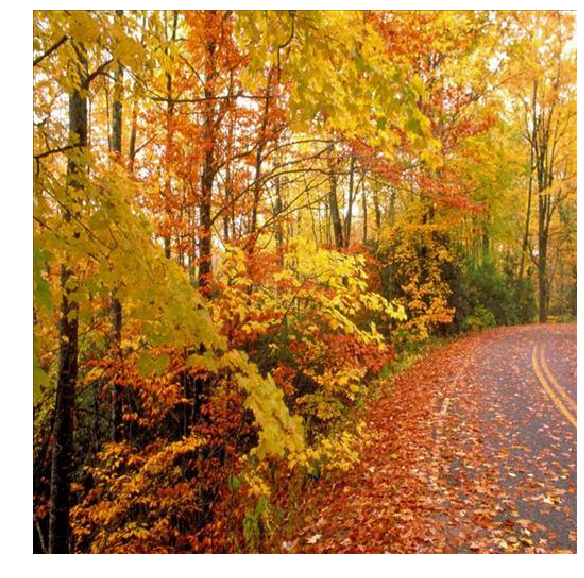

In [58]:
img = image.imread('./color_reduction/sample_img1.png')
fig = plt.figure()
fig.set_size_inches(10, 10)
plt.imshow(img)
plt.axis('off')

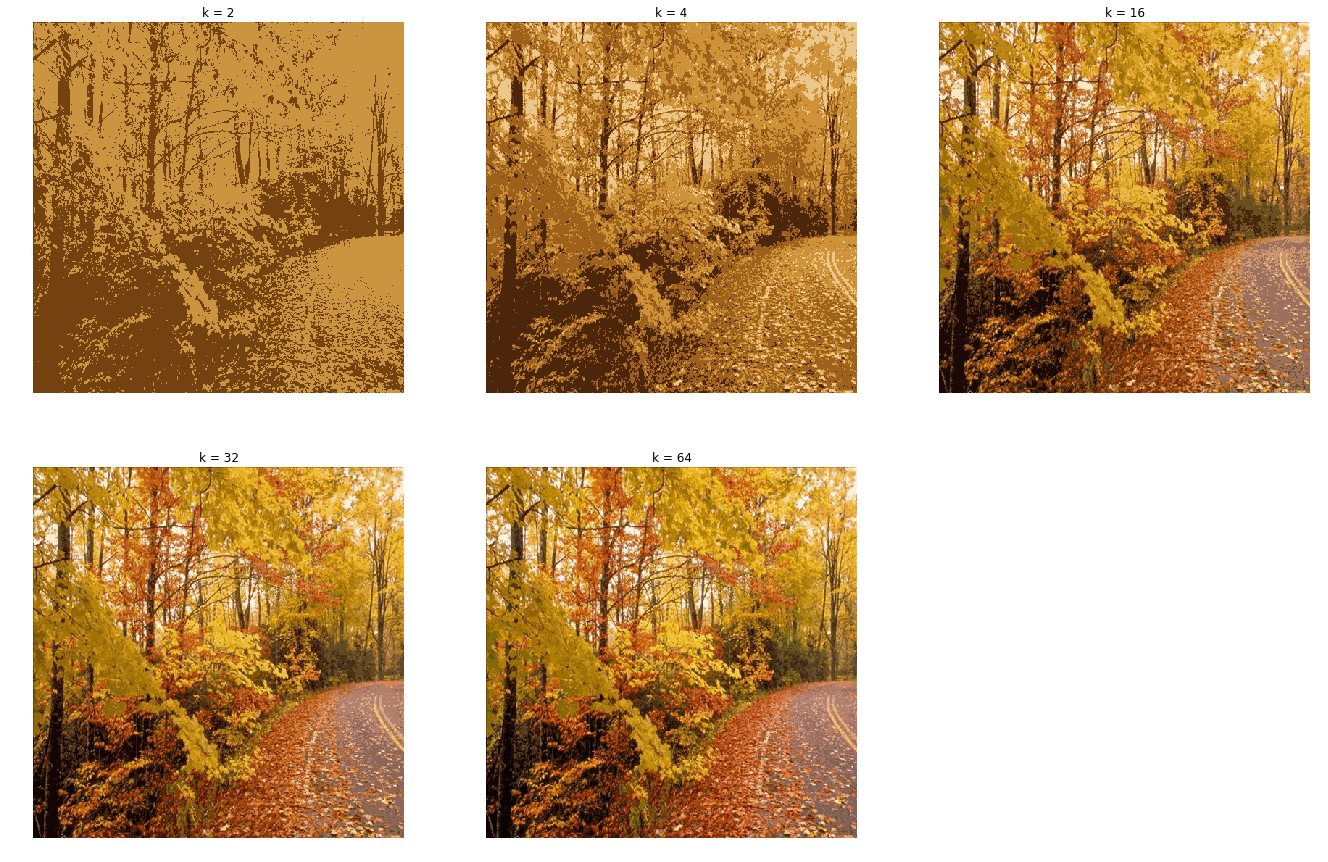

In [63]:
ks = [2, 4, 16, 32, 64]
img_matrix = img.reshape((-1, 3))

fig, axes = plt.subplots(2, 3)
axes = axes.reshape((-1))
fig.set_size_inches(23, 15)
for i, k in enumerate(ks):
    new_img = np.copy(img_matrix)
    centroids, clusters = kmeans_clustering(img_matrix, k, 100)
    for j in range(k):
        new_img[clusters == j, :] = centroids[j]
    reduced = new_img.reshape(int(math.sqrt(new_img.shape[0])), -1, 3)
    axes[i].imshow(reduced)
    axes[i].title.set_text('k = {}'.format(k))

for i in range(6):
    axes[i].axis('off')